In [0]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import numpy as np

In [0]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [0]:
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]
X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2],test_size=.5,random_state=random_state)
classifier = svm.LinearSVC(random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

In [6]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
try:
    from inspect import signature
except ImportError:
    from ..externals.funcsigs import signature
precision, recall, _ = precision_recall_curve(y_test, y_score)


Average precision-recall score: 0.88


In [0]:
step_kwargs = ({'step': 'post'} if 'step' in signature(plt.fill_between).parameters else {})


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.88')

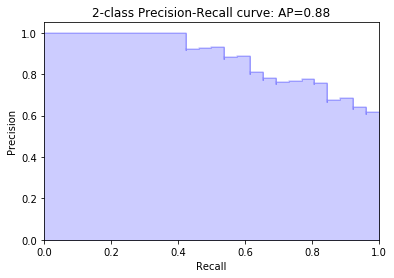

In [8]:
plt.step(recall, precision, color='b', alpha=0.2,where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))